<a href="https://colab.research.google.com/github/ki4rex/srussell149/blob/master/Scikit_Learn_Tree_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-Learn Project: Building a Decision Tree Classification Model

Dataset shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


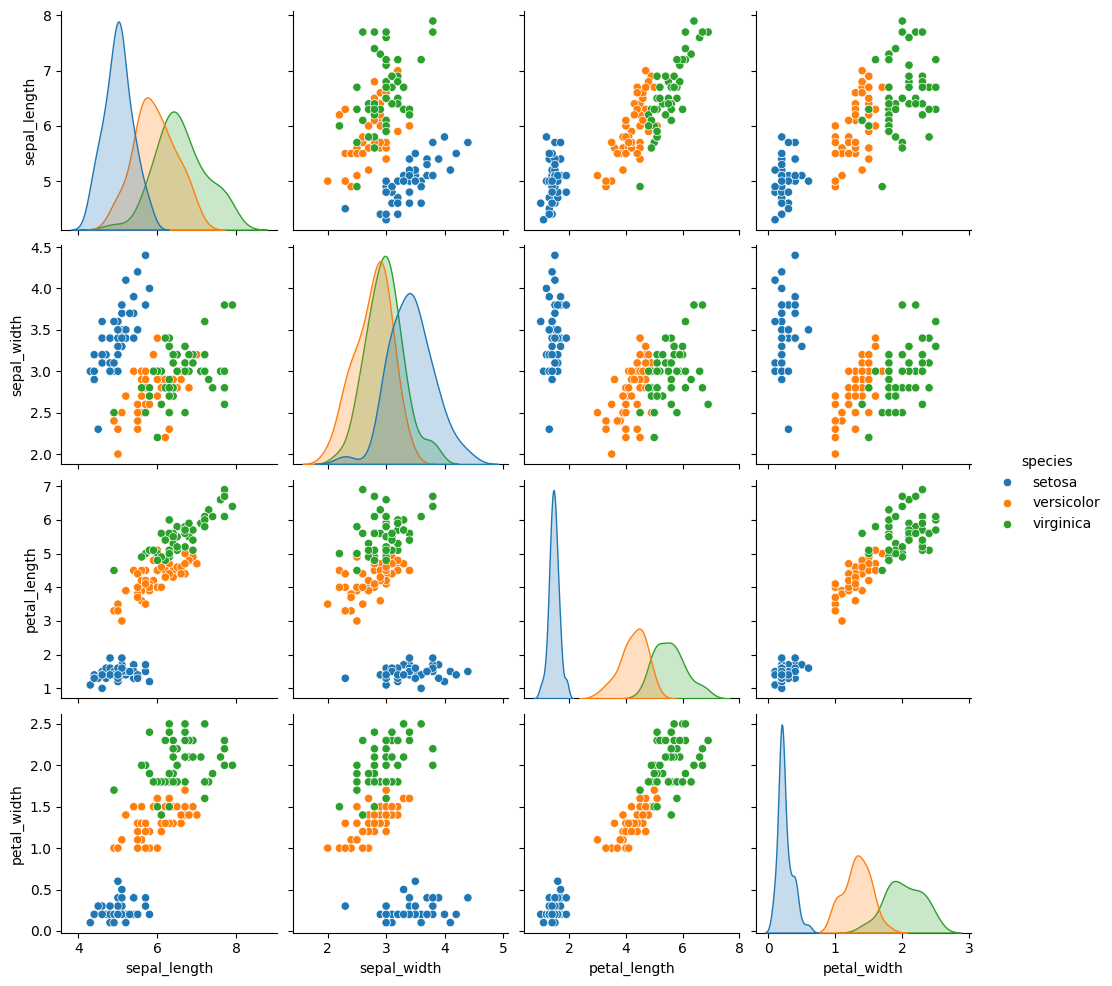

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.95


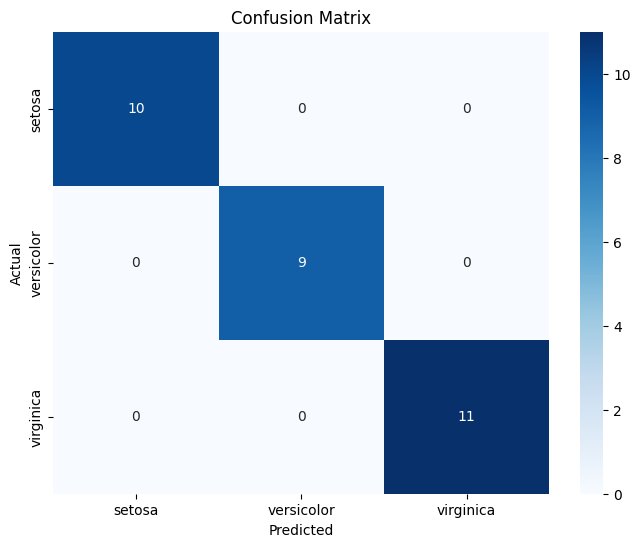

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



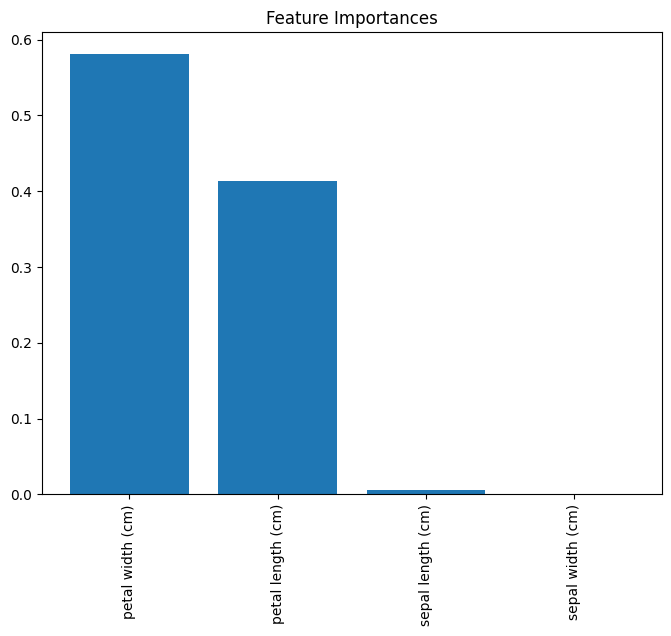

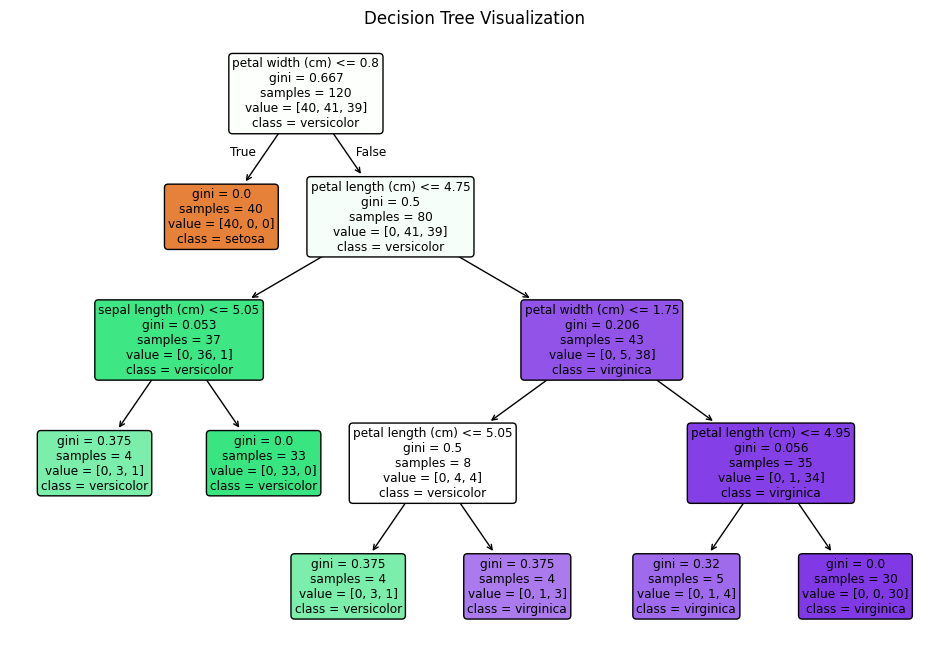

Loaded Model Accuracy: 1.00


In [3]:
# Code Author/transcriber = Ryan Russell
# Based off of example code form the book Essentials of AI for Beginners By Melissa Peneycad

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Basic dataset overview
print(f'Dataset shape: {X.shape}')
print(f'Classes: {iris.target_names}')
print(f'Feature names: {iris.feature_names}')

# Visualize pairplot to see the relationships between features
# Pairplot shows the relationship between different features, colored by species,
# giving a visual understanding of the dataset’s structure
sns.pairplot(sns.load_dataset('iris'), hue='species')
plt.show()

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

# Use the best model
model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names,
yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
features = iris.feature_names
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names,
class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Save the model
joblib.dump(model, 'decision_tree_model.pkl')

# Load the model
loaded_model = joblib.load('decision_tree_model.pkl')

# Verify the loaded model
y_loaded_pred = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_loaded_pred)
print(f'Loaded Model Accuracy: {accuracy_loaded:.2f}')

